pip install lableme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [86]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached protobuf-3.19.6-cp39-cp39-macosx_10_9_x86_64.whl (980 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/g9/22xwm4452fxg5tjtdd93dq1r0000gn/T/pip-install-ft3l2414/tensorflow-gpu_5529d013f5044316ba3d3d1ed22843f7/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      


In [4]:
import os
import time
import uuid
import cv2


In [5]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

Camera should be notificate to user when want to open and start capture

In [4]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collectiong image {}'.format(imgnum))
    ret,frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame', frame)
    time.sleep(1)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Collectiong image 0
Collectiong image 1


1   HIToolbox                           0x00007ff82298152b _ZN15MenuBarInstance21IsAutoShowHideAllowedEv + 259
2   HIToolbox                           0x00007ff82287a33e _ZN15MenuBarInstance24UpdateAutoShowVisibilityE5Pointh + 34
3   HIToolbox                           0x00007ff82287a2b3 _ZN15MenuBarInstance14EnableAutoShowEv + 47
4   HIToolbox                           0x00007ff82281e908 SetMenuBarObscured + 408
5   HIToolbox                           0x00007ff82281e4ca _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 164
6   HIToolbox                           0x00007ff822818996 _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 252
7   HIToolbox                           0x00007ff8227e0bd2 _NotifyEventLoopObservers + 153
8   HIToolbox                           0x00007ff8228183e6 AcquireEventFromQueue + 494
9   HIToolbox                           0x00007ff8228073ec ReceiveNextEventCommon + 285
10  HIToolbox                           0x00007ff8228072b3

Collectiong image 2
Collectiong image 3
Collectiong image 4
Collectiong image 5
Collectiong image 6
Collectiong image 7
Collectiong image 8
Collectiong image 9
Collectiong image 10
Collectiong image 11
Collectiong image 12
Collectiong image 13
Collectiong image 14
Collectiong image 15
Collectiong image 16
Collectiong image 17
Collectiong image 18
Collectiong image 19
Collectiong image 20
Collectiong image 21
Collectiong image 22
Collectiong image 23
Collectiong image 24
Collectiong image 25
Collectiong image 26
Collectiong image 27
Collectiong image 28
Collectiong image 29


#dont forget to code turning of camera

In [6]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [7]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

2023-02-05 08:32:18.424861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
images.as_numpy_iterator().next()

b'data/images/262cff5c-a2f6-11ed-a074-2ea0c7643441.jpg'

In [9]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img


In [10]:
images = images.map(load_image)

In [11]:
images.as_numpy_iterator().next()

array([[[114, 117, 110],
        [110, 113, 106],
        [114, 117, 110],
        ...,
        [169, 181, 177],
        [169, 181, 177],
        [168, 180, 176]],

       [[114, 117, 110],
        [112, 115, 108],
        [118, 121, 114],
        ...,
        [169, 181, 177],
        [169, 181, 177],
        [168, 180, 176]],

       [[115, 118, 111],
        [113, 116, 109],
        [114, 117, 110],
        ...,
        [168, 179, 175],
        [167, 179, 175],
        [166, 178, 174]],

       ...,

       [[ 85,  83,  70],
        [ 82,  80,  67],
        [ 81,  79,  66],
        ...,
        [196, 208, 208],
        [195, 207, 207],
        [199, 211, 211]],

       [[ 82,  80,  67],
        [ 83,  81,  68],
        [ 81,  79,  66],
        ...,
        [199, 210, 212],
        [202, 214, 214],
        [206, 218, 218]],

       [[ 86,  84,  71],
        [ 86,  84,  71],
        [ 85,  83,  70],
        ...,
        [196, 207, 209],
        [199, 211, 211],
        [201, 213, 213]]

In [12]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [13]:
image_generator = images.batch(4).as_numpy_iterator()

In [14]:
plot_images = image_generator.next()

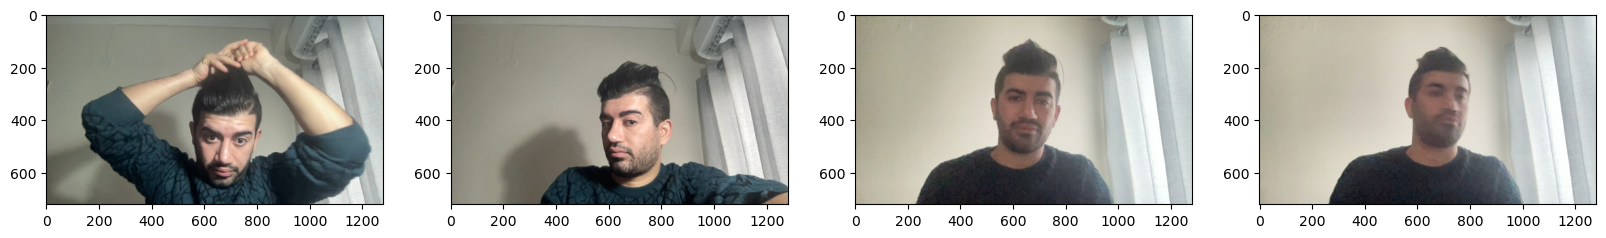

In [15]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [12]:
90*.7 # 62 to train

62.99999999999999

In [13]:
90*.15 #  12 in test and val

13.5

In [16]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [17]:
import albumentations as alb

In [18]:
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
alb.HorizontalFlip(p=0.5),
alb.RandomBrightnessContrast(p=0.2),
alb.RandomGamma(p=0.2),
alb.RGBShift(p=0.2),
alb.VerticalFlip(p=0.5)],
bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels']))

In [19]:
img =cv2.imread(os.path.join('data','train','images','2a9fdcc6-a2f6-11ed-a074-2ea0c7643441.jpg'))

In [20]:
img

array([[[113, 125, 131],
        [110, 122, 128],
        [114, 126, 132],
        ...,
        [200, 210, 217],
        [205, 215, 222],
        [183, 195, 201]],

       [[112, 124, 130],
        [110, 122, 128],
        [114, 126, 132],
        ...,
        [201, 211, 218],
        [206, 216, 223],
        [193, 205, 211]],

       [[114, 126, 132],
        [112, 124, 130],
        [116, 128, 134],
        ...,
        [201, 212, 216],
        [205, 215, 222],
        [193, 205, 211]],

       ...,

       [[126, 136, 143],
        [126, 136, 143],
        [122, 132, 139],
        ...,
        [ 27,  22,  23],
        [ 28,  23,  24],
        [ 22,  17,  18]],

       [[129, 139, 146],
        [131, 141, 148],
        [124, 133, 142],
        ...,
        [ 51,  46,  47],
        [ 45,  40,  41],
        [ 64,  59,  60]],

       [[126, 136, 143],
        [133, 143, 150],
        [127, 136, 145],
        ...,
        [ 39,  34,  35],
        [ 46,  41,  42],
        [ 31,  26,  27]]

In [21]:
import os

In [22]:
with open(os.path.join('data', 'train', 'labels', '2a9fdcc6-a2f6-11ed-a074-2ea0c7643441.json'), 'r') as f: #in this json file image size H , W
    label = json.load(f) 

In [23]:
label['shapes'][0]['points']

[[441.26582278481015, 47.341772151898795],
 [815.9493670886076, 472.6582278481013]]

In [24]:
label['shapes'][0]['label']

'face'

In [25]:
croods = [0,0,0,0]
croods[0] = label['shapes'][0]['points'][0][0]
croods[1] = label['shapes'][0]['points'][0][1]
croods[2] = label['shapes'][0]['points'][1][0]
croods[3] = label['shapes'][0]['points'][1][1]

In [26]:
croods

[441.26582278481015, 47.341772151898795, 815.9493670886076, 472.6582278481013]

In [27]:
croods = list(np.divide(croods, [1280,720,1280,720])) # it should be the exact size of image (which is in json file you can find it)

In [28]:
croods

[0.34473892405063294,
 0.06575246132208167,
 0.6374604430379747,
 0.6564697609001408]

In [29]:
augmented = augmentor(image=img, bboxes=[croods], class_labels=['face'])


In [30]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [31]:
augmented['bboxes'][0][2:] #this is return X-max and Y-max #if image size be not match , this part of code will not working 

(1.0, 1.0)

In [32]:
cv2.rectangle(augmented['image'],
            tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
            tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
             (255,0,0),2)

array([[[ 28,  25,  22],
        [ 39,  36,  33],
        [ 32,  29,  26],
        ...,
        [ 70,  66,  43],
        [ 34,  28,  14],
        [ 42,  36,  18]],

       [[ 33,  29,  29],
        [ 37,  33,  33],
        [ 38,  34,  34],
        ...,
        [ 79,  75,  52],
        [ 40,  34,  16],
        [ 39,  33,  15]],

       [[ 32,  28,  28],
        [ 32,  28,  28],
        [ 33,  29,  29],
        ...,
        [ 75,  71,  48],
        [ 41,  35,  17],
        [ 33,  27,  14]],

       ...,

       [[211, 215, 215],
        [214, 220, 221],
        [220, 226, 227],
        ...,
        [176, 192, 198],
        [174, 190, 196],
        [255,   0,   0]],

       [[211, 215, 215],
        [211, 217, 218],
        [218, 224, 225],
        ...,
        [175, 191, 197],
        [175, 191, 197],
        [255,   0,   0]],

       [[213, 217, 217],
        [208, 214, 215],
        [215, 221, 222],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

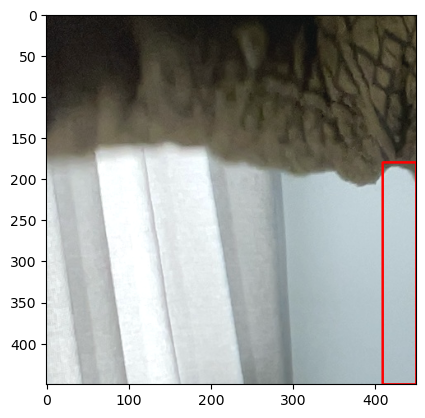

In [33]:
plt.imshow(augmented['image'])

In [34]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
        
        croods[0] = label['shapes'][0]['points'][0][0]
        croods[1] = label['shapes'][0]['points'][0][1]
        croods[2] = label['shapes'][0]['points'][1][0]
        croods[3] = label['shapes'][0]['points'][1][1]
        croods = list(np.divide(croods,[1280,720,1280,720]))
        
    try:
        for x in range(60):
            augmented = augmentor(image= img ,bboxes = [croods], class_labels =['face'])
            cv2.imwrite(os.path.join('aug_data',partition,'images',f'{image.split(".")[0]}.{x}.jpg'),augmented['image'])
            annotation = {}
            annotation['image'] = image
            
            if os.path.exists(label_path):
                if len(augmented['bboxes']) == 0:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0
                else:
                     annotation['bbox'] = augmented['bboxes'][0]
                     annotation['class'] = 1
                                     
            else:
                 annotation['bbox'] = [0,0,0,0]
                 annotation['class'] = 0
        
            with open(os.path.join('aug_data' , partition, 'labels',f'{image.split(".")[0]}.{x}.json'),'w') as f:
                    json.dump(annotation,f)
    except Exception as e:
          print(e)

In [35]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg' , shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x,(120,120)))
train_images = train_images.map(lambda x: x/255)

In [36]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg',shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images = test_images.map(lambda x: x/255)

In [37]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg' , shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images = val_images.map(lambda x: x/255)

In [38]:
train_images.as_numpy_iterator().next()

array([[[0.45232844, 0.39742646, 0.3542892 ],
        [0.44871324, 0.38737744, 0.34344363],
        [0.44362745, 0.3887255 , 0.34558824],
        ...,
        [0.65294117, 0.6333333 , 0.55490196],
        [0.67242646, 0.6528186 , 0.56715685],
        [0.66654414, 0.6515319 , 0.5637255 ]],

       [[0.43504903, 0.3807598 , 0.3373162 ],
        [0.39767158, 0.3427696 , 0.2917892 ],
        [0.43492648, 0.38002452, 0.3290441 ],
        ...,
        [0.6558211 , 0.63621324, 0.5568015 ],
        [0.65539217, 0.6357843 , 0.5495098 ],
        [0.6548407 , 0.63523287, 0.54895836]],

       [[0.42371324, 0.37665442, 0.3295956 ],
        [0.42781863, 0.3797794 , 0.32536766],
        [0.41366422, 0.35876226, 0.30778188],
        ...,
        [0.66047794, 0.6408701 , 0.5545956 ],
        [0.6609681 , 0.6413603 , 0.5550858 ],
        [0.6610907 , 0.6390319 , 0.5527574 ]],

       ...,

       [[0.73615193, 0.72046566, 0.62242645],
        [0.7325368 , 0.7168505 , 0.61881125],
        [0.7339461 , 0

In [39]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding="utf8") as f:
        label = json.load(f)
    return [label['class']], label['bbox']

In [40]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8 , tf.float16]))

In [41]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.    , 0.4507, 0.683 ], dtype=float16))

In [42]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [43]:
test_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.2117, 0.5615, 1.    ], dtype=float16))

In [45]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json',shuffle=False)
val_labels = val_labels.map(lambda x:tf.py_function(load_labels,[x],[tf.uint8 , tf.float16]))

In [46]:
val_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

In [47]:
len(train_images),len(train_labels) , len(test_images),len(test_labels) , len(val_images) , len(val_labels)

(60, 60, 60, 60, 60, 60)

In [48]:
train = tf.data.Dataset.zip((train_images,train_labels))
train = train.shuffle(4000)
train = train.batch(8)
train = train.prefetch(4)

In [49]:
test = tf.data.Dataset.zip((test_images,test_labels))
test = test.shuffle(2000)
test = test.batch(8)
test = test.prefetch(4)

In [50]:
val = tf.data.Dataset.zip((val_images , val_labels))
val = val.shuffle(900)
val = val.batch(8)
val = val.prefetch(4)

In [51]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.     , 0.     , 0.4507 , 0.683  ],
        [0.1316 , 0.1364 , 0.7334 , 0.887  ],
        [0.38   , 0.4104 , 0.982  , 1.     ],
        [0.     , 0.263  , 0.478  , 1.     ],
        [0.764  , 0.02597, 1.     , 0.777  ],
        [0.04645, 0.4392 , 0.6484 , 1.     ],
        [0.636  , 0.     , 1.     , 0.6294 ],
        [0.555  , 0.1719 , 1.     , 0.923  ]], dtype=float16))

In [52]:
data_samples = train.as_numpy_iterator()

In [53]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


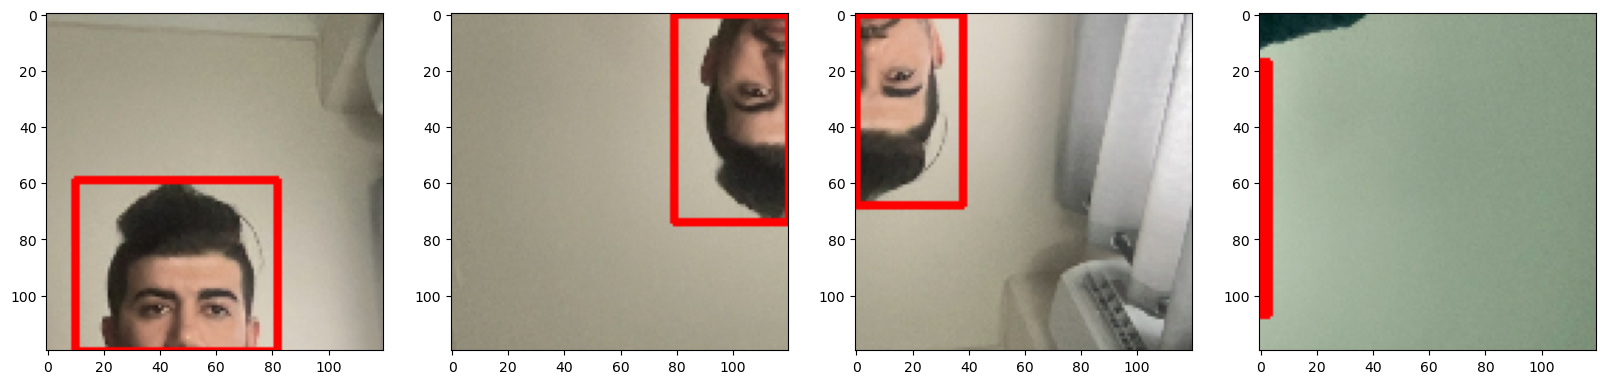

In [54]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample_image  = res[0][idx]
    sample_croods = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                 tuple(np.multiply(sample_croods[:2],[120,120]).astype(int)),
                 tuple(np.multiply(sample_croods[2:],[120,120]).astype(int)),
                 (255,0,0),2)
    ax[idx].imshow(sample_image)

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dense,GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [60]:
vgg = VGG16(include_top=False)

In [62]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [64]:
def build_model():
    input_layer = Input(shape=[120,120,3])
    vgg = VGG16(include_top=False)(input_layer)
    
    #classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048,activation='relu')(f1)
    class2 = Dense(1,activation='sigmoid')(class1)
    
    #Bounding Box Model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048,activation='relu')(f2)
    regress2 = Dense(4,activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer,outputs=[class2,regress2])
    return facetracker

In [66]:
facetracker = build_model()

In [68]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_6[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [72]:
X,y = train.as_numpy_iterator().next()

In [74]:
X.shape

(8, 120, 120, 3)

In [76]:
classes,croods = facetracker.predict(X)

1/1 [==============================] - 0s 482ms/step


In [78]:
classes,croods

(array([[0.7018103 ],
        [0.6830183 ],
        [0.6829068 ],
        [0.71376896],
        [0.62436485],
        [0.6151886 ],
        [0.6885069 ],
        [0.6130567 ]], dtype=float32),
 array([[0.40700483, 0.71030957, 0.37780055, 0.6303557 ],
        [0.41174924, 0.67748445, 0.53951716, 0.56511086],
        [0.40349394, 0.75920135, 0.41875586, 0.5848533 ],
        [0.45860887, 0.6473697 , 0.49409887, 0.57322264],
        [0.44386345, 0.642785  , 0.49651   , 0.5501595 ],
        [0.46823698, 0.5411465 , 0.45338157, 0.55659103],
        [0.43938345, 0.70357496, 0.48081207, 0.62106454],
        [0.45057395, 0.6690359 , 0.48186252, 0.52611494]], dtype=float32))

In [82]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1) /batches_per_epoch

In [84]:
lr_decay

0.04166666666666666

In [86]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=lr_decay)

In [95]:
def localization_loss(y_true,yhat):
    delta_crood = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]
    
    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    return delta_crood + delta_size

In [96]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [98]:
localization_loss(y[1],croods)

<tf.Tensor: shape=(), dtype=float32, numpy=9.325609>

In [100]:
classloss(y[0],classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.53019845>

In [102]:
regressloss(y[1],croods)

<tf.Tensor: shape=(), dtype=float32, numpy=9.325609>

In [125]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [126]:
model = FaceTracker(facetracker)

In [127]:
model.compile(opt,classloss,regressloss)

In [128]:
logdir='logs'

In [129]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [132]:
hist = model.fit(train,epochs=10 , validation_data=val , callbacks=[tensorboard_callback])

Epoch 1/10
8/8 [==============================] - 15s 2s/step - total_loss: 0.0999 - class_loss: 0.0206 - regress_loss: 0.0896 - val_total_loss: 5.6320 - val_class_loss: 5.3444 - val_regress_loss: 2.9598
Epoch 2/10
8/8 [==============================] - 15s 2s/step - total_loss: 0.0952 - class_loss: 0.0218 - regress_loss: 0.0843 - val_total_loss: 6.7108 - val_class_loss: 7.7844 - val_regress_loss: 2.8186
Epoch 3/10
8/8 [==============================] - 15s 2s/step - total_loss: 0.0899 - class_loss: 0.0198 - regress_loss: 0.0800 - val_total_loss: 7.5880 - val_class_loss: 8.1156 - val_regress_loss: 3.5302
Epoch 4/10
8/8 [==============================] - 15s 2s/step - total_loss: 0.0858 - class_loss: 0.0185 - regress_loss: 0.0766 - val_total_loss: 5.9766 - val_class_loss: 6.7944 - val_regress_loss: 2.5794
Epoch 5/10
8/8 [==============================] - 15s 2s/step - total_loss: 0.0840 - class_loss: 0.0189 - regress_loss: 0.0745 - val_total_loss: 8.2616 - val_class_loss: 10.1086 - val_

In [136]:
hist.history

{'total_loss': [0.004278248641639948,
  0.04130037501454353,
  0.00879080779850483,
  0.019122811034321785,
  0.0053779021836817265,
  0.44203484058380127,
  0.5837358236312866,
  0.0031710180919617414,
  0.0032248503994196653,
  0.0034918319433927536],
 'class_loss': [3.351351915625855e-05,
  0.011861215345561504,
  0.00039161709719337523,
  0.0002772831649053842,
  7.157865911722183e-05,
  0.13252553343772888,
  0.2975625991821289,
  9.049036452779546e-05,
  0.0004414434661157429,
  0.0001967393036466092],
 'regress_loss': [0.004261491820216179,
  0.03536976873874664,
  0.008594999089837074,
  0.018984168767929077,
  0.0053421128541231155,
  0.375772088766098,
  0.4349544942378998,
  0.003125772811472416,
  0.0030041285790503025,
  0.0033934623934328556],
 'val_total_loss': [5.631988525390625,
  6.710806846618652,
  7.588040351867676,
  5.976609230041504,
  8.261554718017578,
  7.7291741371154785,
  9.5014009475708,
  3.8705973625183105,
  7.653426647186279,
  5.902215957641602],
 'v

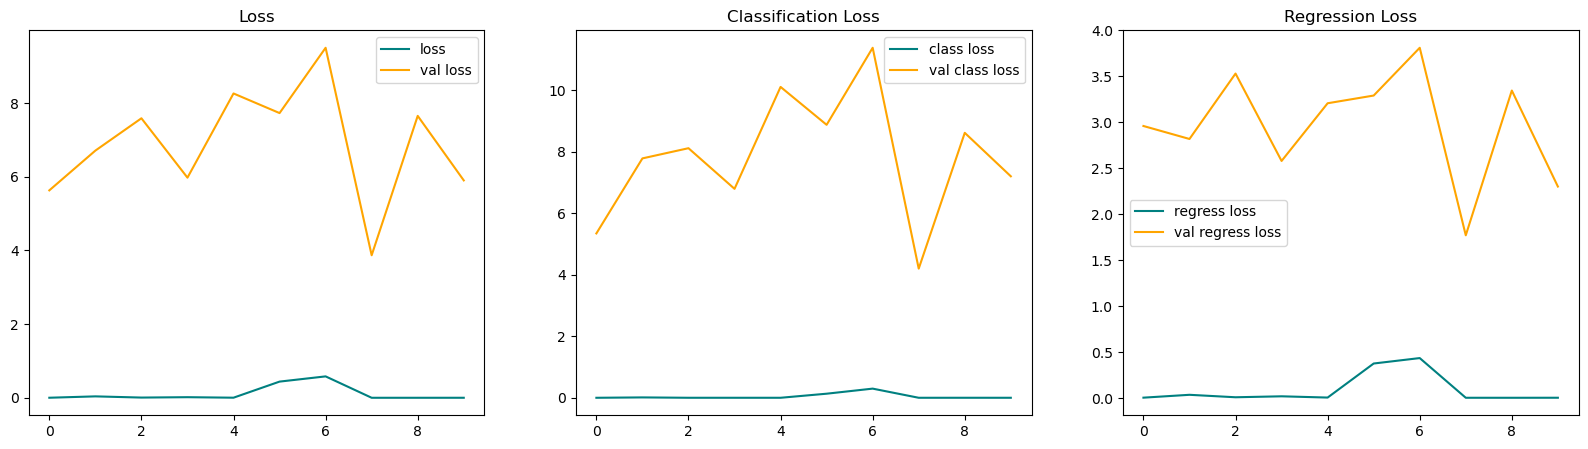

In [143]:
fig, ax = plt.subplots(ncols=3,figsize=(20,5))

ax[0].plot(hist.history['total_loss'],color='teal',label='loss')
ax[0].plot(hist.history['val_total_loss'] , color ='orange',label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss' ], color='teal' , label='class loss')
ax[1].plot(hist.history['val_class_loss'] , color = 'orange' , label ='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color ='teal' , label='regress loss')
ax[2].plot(hist.history['val_regress_loss'] , color ='orange' , label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [146]:
test_data = test.as_numpy_iterator()

In [149]:
test_sample = test_data.next()

In [151]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 485ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


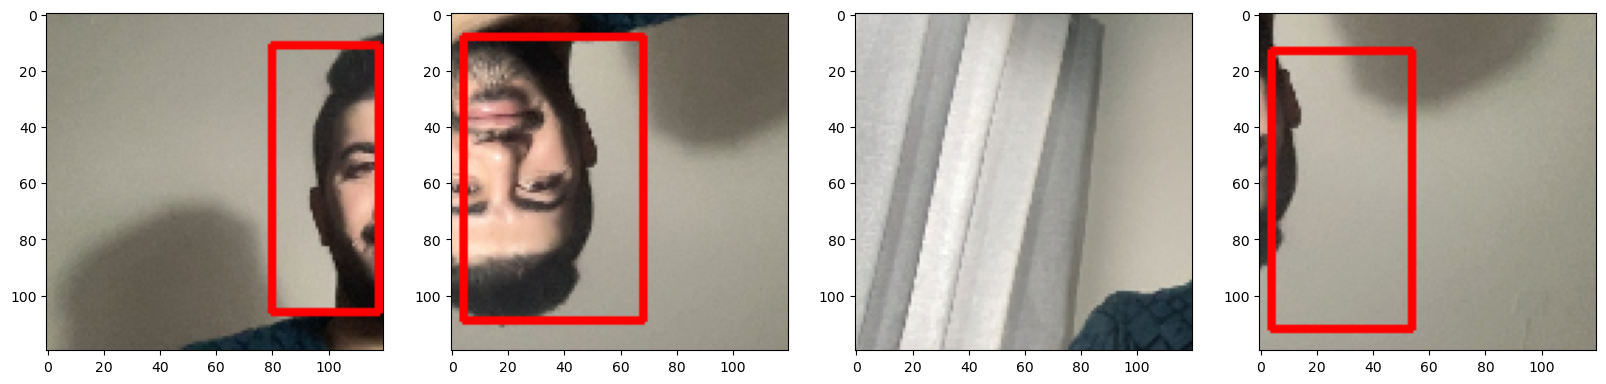

In [152]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)